In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
df = sns.load_dataset("planets")
df.head(10)

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009
5,Radial Velocity,1,185.840,4.80,76.39,2008
6,Radial Velocity,1,1773.400,4.64,18.15,2002
7,Radial Velocity,1,798.500,NaN,21.41,1996
8,Radial Velocity,1,993.300,10.30,73.10,2008
9,Radial Velocity,2,452.800,1.99,74.79,2010


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [5]:
df.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


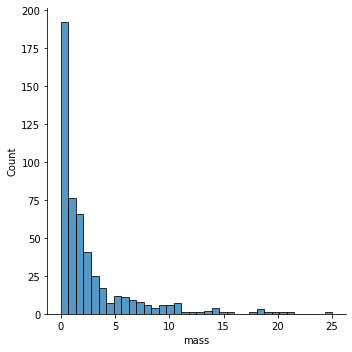

In [5]:
sns.displot(x="mass", data=df)

In [6]:
df.shape

(1035, 6)

In [7]:
df["orbital_period"].min()

0.09070629

In [10]:
df["orbital_period"].idxmin()

945

In [8]:
df["orbital_period"].max()

730000.0

In [9]:
df["orbital_period"].std()

26014.728304062508

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [14]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [16]:
df.dropna(how="any")

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.30000,7.100,77.40,2006
1,Radial Velocity,1,874.77400,2.210,56.95,2008
2,Radial Velocity,1,763.00000,2.600,19.84,2011
3,Radial Velocity,1,326.03000,19.400,110.62,2007
4,Radial Velocity,1,516.22000,10.500,119.47,2009
...,...,...,...,...,...,...
640,Radial Velocity,1,111.70000,2.100,14.90,2009
641,Radial Velocity,1,5.05050,1.068,44.46,2013
642,Radial Velocity,1,311.28800,1.940,17.24,1999
649,Transit,1,2.70339,1.470,178.00,2013


In [17]:
df.corr()

,number,orbital_period,mass,distance,year
number,1.000000,-0.012570,-0.241429,-0.033638,0.147849
orbital_period,-0.012570,1.000000,0.173725,-0.034365,-0.032333
mass,-0.241429,0.173725,1.000000,0.274082,-0.123787
distance,-0.033638,-0.034365,0.274082,1.000000,0.178922
year,0.147849,-0.032333,-0.123787,0.178922,1.000000


In [18]:
df[["mass", "distance"]].corr()

,mass,distance
mass,1.000000,0.274082
distance,0.274082,1.000000


In [20]:
df["method"].value_counts(dropna=False)

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

## Groupby

In [21]:
df.groupby("method")["orbital_period"].mean()

method
Astrometry                          631.180000
Eclipse Timing Variations          4751.644444
Imaging                          118247.737500
Microlensing                       3153.571429
Orbital Brightness Modulation         0.709307
Pulsar Timing                      7343.021201
Pulsation Timing Variations        1170.000000
Radial Velocity                     823.354680
Transit                              21.102073
Transit Timing Variations            79.783500
Name: orbital_period, dtype: float64

In [22]:
df.groupby("method")[["orbital_period"]].mean()

,orbital_period
method,
Astrometry,631.180000
Eclipse Timing Variations,4751.644444
Imaging,118247.737500
Microlensing,3153.571429
Orbital Brightness Modulation,0.709307
Pulsar Timing,7343.021201
Pulsation Timing Variations,1170.000000
Radial Velocity,823.354680
Transit,21.102073


In [23]:
df.groupby("method")[["orbital_period"]].describe()

orbital_period                                \
                                       count           mean            std   
method                                                                       
Astrometry                               2.0     631.180000     544.217663   
Eclipse Timing Variations                9.0    4751.644444    2499.130945   
Imaging                                 12.0  118247.737500  213978.177277   
Microlensing                             7.0    3153.571429    1113.166333   
Orbital Brightness Modulation            3.0       0.709307       0.725493   
Pulsar Timing                            5.0    7343.021201   16313.265573   
Pulsation Timing Variations              1.0    1170.000000            NaN   
Radial Velocity                        553.0     823.354680    1454.926210   
Transit                                397.0      21.102073      46.185893   
Transit Timing Variations                3.0      79.783500      71.599884   

                                                                       \
                                       min          25%           50%   
method                                                                  
Astrometry                      246.360000   438.770000    631.180000   
Eclipse Timing Variations      1916.250000  2900.000000   4343.500000   
Imaging                        4639.150000  8343.900000  27500.000000   
Microlensing                   1825.000000  2375.000000   3300.000000   
Orbital Brightness Modulation     0.240104     0.291496      0.342887   
Pulsar Timing                     0.090706    25.262000     66.541900   
Pulsation Timing Variations    1170.000000  1170.000000   1170.000000   
Radial Velocity                   0.736540    38.021000    360.200000   
Transit                           0.355000     3.160630      5.714932   
Transit Timing Variations        22.339500    39.675250     57.011000   

                                                            
                                        75%            max  
method                                                      
Astrometry                       823.590000    1016.000000  
Eclipse Timing Variations       5767.000000   10220.000000  
Imaging                        94250.000000  730000.000000  
Microlensing                    3550.000000    5100.000000  
Orbital Brightness Modulation      0.943908       1.544929  
Pulsar Timing                     98.211400   36525.000000  
Pulsation Timing Variations     1170.000000    1170.000000  
Radial Velocity                  982.000000   17337.500000  
Transit                           16.145700     331.600590  
Transit Timing Variations        108.505500     160.000000

In [26]:
df["year"].unique()

array([2006, 2008, 2011, 2007, 2009, 2002, 1996, 2010, 2001, 1995, 2004,
       2012, 2013, 2005, 2000, 2003, 1997, 1999, 2014, 1998, 1989, 1992,
       1994], dtype=int64)

In [24]:
df.year.unique()

array([2006, 2008, 2011, 2007, 2009, 2002, 1996, 2010, 2001, 1995, 2004,
       2012, 2013, 2005, 2000, 2003, 1997, 1999, 2014, 1998, 1989, 1992,
       1994], dtype=int64)

In [25]:
df.year.nunique()

23

In [73]:
data = {'Company':['GOOG', 'GOOG', 'MSFT', 'MSFT', 'FB', 'FB'],
       'Person':['Sam', 'Charlie', 'Amy', 'Vanessa', 'Carl', 'Sarah'],
       'Sales':[200, 120, 340, 124, 243, 350]}

In [74]:
df1 = pd.DataFrame(data)
df1

,Company,Person,Sales
0,GOOG,Sam,200
1,GOOG,Charlie,120
2,MSFT,Amy,340
3,MSFT,Vanessa,124
4,FB,Carl,243
5,FB,Sarah,350


In [29]:
df1.groupby("Company")["Sales"].mean()

Company
FB      296.5
GOOG    160.0
MSFT    232.0
Name: Sales, dtype: float64

In [30]:
df1.groupby("Company")["Sales"].std()

Company
FB       75.660426
GOOG     56.568542
MSFT    152.735065
Name: Sales, dtype: float64

In [33]:
df1.groupby("Company")["Sales"].describe().T["GOOG"]

count      2.000000
mean     160.000000
std       56.568542
min      120.000000
25%      140.000000
50%      160.000000
75%      180.000000
max      200.000000
Name: GOOG, dtype: float64

In [34]:
df2 = pd.DataFrame({'col1':[1,2,3,4],'col2':[444,555,666,444],'col3':['abc','def','ghi','xyz']})
df2.head()

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   col1    4 non-null      int64 
 1   col2    4 non-null      int64 
 2   col3    4 non-null      object
dtypes: int64(2), object(1)
memory usage: 224.0+ bytes


In [36]:
df2.col2.unique()

array([444, 555, 666], dtype=int64)

In [37]:
df2.col2.nunique()

3

In [38]:
df2.col2.value_counts()

444    2
666    1
555    1
Name: col2, dtype: int64

In [39]:
df2

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


- col1 >2 ve col2=444

In [41]:
newdf = df2[(df2["col1"]>2) & (df2["col2"]==444)]
newdf

,col1,col2,col3
3,4,444,xyz


In [42]:
df2["col2"].sum()

2109

In [43]:
del df2["col1"]

In [44]:
df2

,col2,col3
0,444,abc
1,555,def
2,666,ghi
3,444,xyz


In [46]:
df2.columns

Index(['col2', 'col3'], dtype='object')

In [47]:
df2.index

RangeIndex(start=0, stop=4, step=1)

#### Sorting 

In [48]:
df2.sort_values(by = "col2")

,col2,col3
0,444,abc
3,444,xyz
1,555,def
2,666,ghi


In [49]:
df2.sort_values(by = "col2", ascending = False)

,col2,col3
2,666,ghi
1,555,def
0,444,abc
3,444,xyz


In [50]:
df2.sort_values(by = "col3", ascending = True)

,col2,col3
0,444,abc
1,555,def
2,666,ghi
3,444,xyz


In [52]:
df3 = pd.DataFrame({'col1':[1, 2, 3, np.nan],
                   'col2':[np.nan, 555, 666, 444],
                   'col3':['abc', 'def', 'ghi', 'xyz']})
df3

,col1,col2,col3
0,1.0,NaN,abc
1,2.0,555.0,def
2,3.0,666.0,ghi
3,NaN,444.0,xyz


In [53]:
df3.dropna(how= "any")

,col1,col2,col3
1,2.0,555.0,def
2,3.0,666.0,ghi


In [54]:
df3

,col1,col2,col3
0,1.0,NaN,abc
1,2.0,555.0,def
2,3.0,666.0,ghi
3,NaN,444.0,xyz


In [59]:
ort = df3["col2"].mean()

In [60]:
df3["col2"].fillna(ort)

0    555.0
1    555.0
2    666.0
3    444.0
Name: col2, dtype: float64

In [62]:
df3.fillna(ort)

,col1,col2,col3
0,1.0,555.0,abc
1,2.0,555.0,def
2,3.0,666.0,ghi
3,555.0,444.0,xyz


In [56]:
df3.fillna("FILL")

,col1,col2,col3
0,1.0,FILL,abc
1,2.0,555.0,def
2,3.0,666.0,ghi
3,FILL,444.0,xyz


In [61]:
df1

,Company,Person,Sales
0,GOOG,Sam,200
1,GOOG,Charlie,120
2,MSFT,Amy,340
3,MSFT,Vanessa,124
4,FB,Carl,243
5,FB,Sarah,350


### Map & Replace

In [63]:
my_map = {"GOOG": "GOO", "MSFT": "MIC", "FB":"FACE"}

In [75]:
df1["Company"] = df1["Company"].map(my_map)
df1

,Company,Person,Sales
0,GOO,Sam,200
1,GOO,Charlie,120
2,MIC,Amy,340
3,MIC,Vanessa,124
4,FACE,Carl,243
5,FACE,Sarah,350


In [76]:
df1["Sales"] = df1["Sales"].map(lambda x:x*1000)
df1

,Company,Person,Sales
0,GOO,Sam,200000
1,GOO,Charlie,120000
2,MIC,Amy,340000
3,MIC,Vanessa,124000
4,FACE,Carl,243000
5,FACE,Sarah,350000


In [77]:
df1["Company"] = df1["Company"].replace(to_replace="GOO", value="GOOGLE")
df1

,Company,Person,Sales
0,GOOGLE,Sam,200000
1,GOOGLE,Charlie,120000
2,MIC,Amy,340000
3,MIC,Vanessa,124000
4,FACE,Carl,243000
5,FACE,Sarah,350000


In [68]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Company  6 non-null      object
 1   Person   6 non-null      object
 2   Sales    6 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 272.0+ bytes


In [78]:
df1["Sales"] = df1["Sales"].astype(str)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Company  6 non-null      object
 1   Person   6 non-null      object
 2   Sales    6 non-null      object
dtypes: object(3)
memory usage: 272.0+ bytes


In [70]:
"clarusway"[:-3]

'clarus'

In [71]:
"200000"[:-3]

'200'

In [79]:
df1["Sales"] = df1["Sales"].map(lambda x: x[:-3] + "K")
df1

,Company,Person,Sales
0,GOOGLE,Sam,200K
1,GOOGLE,Charlie,120K
2,MIC,Amy,340K
3,MIC,Vanessa,124K
4,FACE,Carl,243K
5,FACE,Sarah,350K


In [80]:
df4 = pd.DataFrame({'groups': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'var1': [10,23,33,22,11,99],
                   'var2': [100,253,333,262,111,969]})
df4

,groups,var1,var2
0,A,10,100
1,B,23,253
2,C,33,333
3,A,22,262
4,B,11,111
5,C,99,969


In [82]:
df4.groupby("groups").mean().T

groups,A,B,C
var1,16,17,66
var2,181,182,651


In [84]:
df4.groupby("groups").aggregate([np.min, np.median, np.max]).T

groups         A    B    C
var1 amin     10   11   33
     median   16   17   66
     amax     22   23   99
var2 amin    100  111  333
     median  181  182  651
     amax    262  253  969

In [85]:
df4.groupby("groups").agg([np.min, np.median, np.max]).T

groups         A    B    C
var1 amin     10   11   33
     median   16   17   66
     amax     22   23   99
var2 amin    100  111  333
     median  181  182  651
     amax    262  253  969

In [87]:
df4.groupby("groups").agg({"var1": "mean", "var2": "max"})

,var1,var2
groups,,
A,16,262
B,17,253
C,66,969


## Apply

In [88]:
df4

,groups,var1,var2
0,A,10,100
1,B,23,253
2,C,33,333
3,A,22,262
4,B,11,111
5,C,99,969


In [92]:
df4.apply(np.sum).T

groups    ABCABC
var1         198
var2        2028
dtype: object

In [90]:
"A" + "B"

'AB'

In [91]:
def clarus(x):
    return x*2

In [94]:
df4["var1"] = df4["var1"].apply(clarus)
df4

,groups,var1,var2
0,A,20,100
1,B,46,253
2,C,66,333
3,A,44,262
4,B,22,111
5,C,198,969


In [95]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
- cinsiyete göre survive ortalaması

In [96]:
titanic.groupby("sex")["survived"].mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [ ]:
- cinsiyet ve kompartman numarası göre survive ortalaması

In [97]:
titanic.groupby(["sex", "class"])["survived"].mean()

sex     class 
female  First     0.968085
        Second    0.921053
        Third     0.500000
male    First     0.368852
        Second    0.157407
        Third     0.135447
Name: survived, dtype: float64